# 08 SVR 迴歸的預測

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 線性

假設我們有個函數

$$f(x) = 1.2x + 0.8$$

In [2]:
x = np.linspace(0, 5, 50)

In [3]:
y = 1.2*x + 0.8

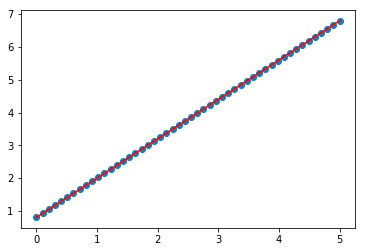

In [5]:
plt.scatter(x,y)
plt.plot(x,y,'r')

#### 真實一點的數據

一般是個「完美」函數加上隨機的 noise。

$$f(x) + \varepsilon(x)$$

In [26]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)

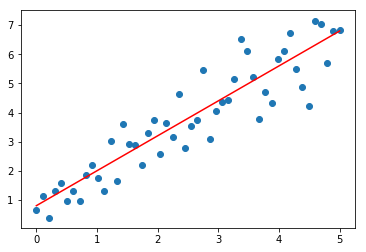

In [27]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

#### 看來像真的一樣！

## SVR

用 SVR 學起來!

In [20]:
from sklearn.svm import SVR

In [28]:
svr_lin = SVR(kernel='linear', C=1e3)

In [44]:
x.shape

(50,)

原來我們 x 的資料型態是

$$[x_1, x_2, \ldots, x_{50}],$$

但 `sklearn` 希望每個 x 是個向量, 也就是:

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

這該如何處理?

#### 提示

* 上面的 shape 是 (50,)
* 下面的 shape 是 (1,50)

In [45]:
X = x.reshape(len(x),1)

#### 看看 shape 改成怎麼樣

In [46]:
x.shape

(50,)

In [47]:
X.shape

(50, 1)

In [48]:
svr_lin.fit(X,y)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [49]:
Y = svr_lin.predict(X)

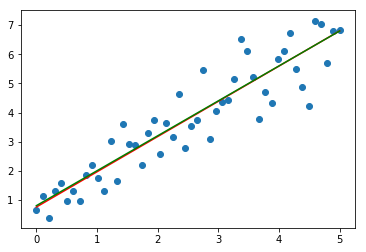

In [51]:
plt.scatter(x,y)
plt.plot(x, Y, 'r')
plt.plot(x, 1.2*x + 0.8, 'g')

#### 當然可以預測沒出現過的...

注意資料的輸入方式。

In [52]:
svr_lin.predict([[6.2]])

array([ 8.25590778])

In [53]:
svr_lin.predict([[6.2], [7.4], [8]])

array([  8.25590778,   9.70809903,  10.43419465])